In [1]:
import pandas as pd
import re
import numpy as np
import pathlib

import matplotlib.pyplot as plt

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'

questions = pd.read_csv(DATA_DIR / 'Questions.csv',encoding="ISO-8859-1")
tags = pd.read_csv(DATA_DIR / 'Tags.csv',encoding="ISO-8859-1")

In [3]:
print(f"questions: legth: {len(questions)} \n columns: {questions.columns}")
print(f"tags: legth: {len(tags)} \n columns: {tags.columns}")

questions: legth: 1264216 
 columns: Index(['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title',
       'Body'],
      dtype='object')
tags: legth: 3750994 
 columns: Index(['Id', 'Tag'], dtype='object')


In [4]:
# Inicialmente irei juntar o dataset de perguntas com o de tags
questions = questions.drop(columns=['OwnerUserId','CreationDate','ClosedDate','Score','Title'])

In [5]:
# 37034 tags diferentes. Fazer limpeza para deixar apenas 1000
tag_counts = tags['Tag'].value_counts()
top_1000_tags = tag_counts.head(150).index.tolist()
filtered_tags = tags[tags['Tag'].isin(top_1000_tags)]

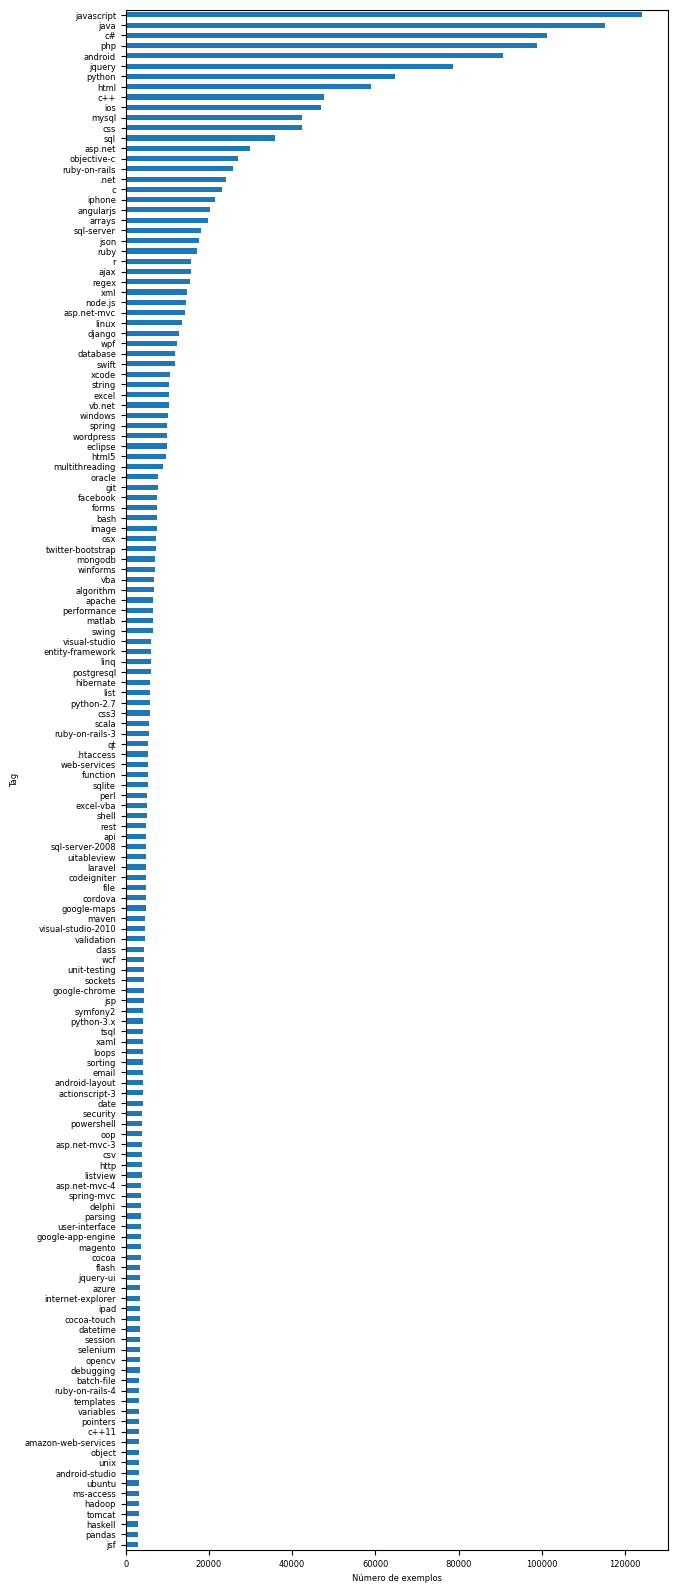

In [8]:
tag_fil_count = filtered_tags['Tag'].value_counts()

plt.figure(figsize=(7,20))
plt.rcParams.update({'font.size': 6})
tag_fil_count[::-1].plot.barh()
plt.xlabel('Número de exemplos')
plt.show()

In [6]:
# plt.figure(figsize=(7,20))
# plt.rcParams.update({'font.size': 6})
# filtered_tags[::-1].plot.barh()
# plt.xlabel('Número de exemplos')
# plt.show()

: 

: 

In [ ]:
t = filtered_tags.copy()
t['Tag'] = t['Tag'].apply(lambda x : str(x))

In [ ]:
complete = questions.merge(t)

In [ ]:
complete = complete.groupby(['Id','Body'])['Tag'].apply(list).reset_index()

In [ ]:
complete

In [ ]:
exp1 = np.random.randint(0,len(complete))
exp2 = np.random.randint(0,len(complete))
print(f"Random examples of the Body:\n Tag:{complete['Tag'][exp1]} \n {complete['Body'][exp1]}  \n\n\n  Tag:{complete['Tag'][exp2]} \n {complete['Body'][exp2]}")

In [ ]:
# Um grande problema encontrado 'e que algumas das perguntas possuem codigo. Para melhorar a performance do modelo,
# irei retirar todos os caracteres especiais 
def clean_body(txt:str):
    txt = txt.replace("<p>"," ")
    txt = txt.replace("</p>"," ")
    txt = txt.replace("<pre><code>"," ")
    txt = txt.replace("</pre></code>"," ")
    new = re.sub("[^0-9a-zA-Z]+"," ",txt)
    return new

complete['Body'] = complete['Body'].apply(clean_body)

In [ ]:
print(f"Random examples of the clean Body: \n Tag:{complete['Tag'][exp1]} \n {complete['Body'][exp1]}  \n\n\n  Tag:{complete['Tag'][exp2]} \n {complete['Body'][exp2]}")

In [ ]:
# Por hora essa limpeza dos dados ja esta bom. Irei salvar em um novo csv
complete.to_csv(DATA_DIR / 'processed_data.csv')